In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

from PIL import Image, ImageFilter

# Preprocessing Functions
These functions will modify the frames of the video image in order to separate each well into a different image that can be investigated and not cause interference between reading each well. 

# Try using the test lepton images - convert to array and section off there 
    * forced to lock in postiton to ensure that it doesn't move

# Inputs for all functions

* until we obtain a frame from a video as a test image - I will be using a set of drawn well plates with varying degrees of tilt to test the boundry definition and tiling. 

In [7]:
#image = Image.open('../doc/Wellplatedrawn_cropman.png') 
image2 = io.imread('../doc/Lepton_Capture.tiff')
image2[0]

array([[29993, 29984, 29966, ..., 29912, 29906, 29914],
       [30001, 29976, 29972, ..., 29914, 29923, 29929],
       [29982, 29974, 29982, ..., 29916, 29906, 29933],
       ...,
       [30113, 30062, 30068, ..., 29862, 29891, 29893],
       [30093, 30068, 30081, ..., 29875, 29873, 29902],
       [30087, 30077, 30066, ..., 29877, 29870, 29896]], dtype=uint16)

## Preprocessing 1: Boundry definition
This will cut out the well plate from the background of the frame - the well plate dimensions should not change so no further modifications will be needed to ensure the cuts are in the correct places. 

## Preprocessing 2: Tiling each well into a seperate image
In order to ensure that there is not temperature spill over from other frames we will tile the single frame in to 96 separate images - this will allow each frame to be read as 96 individual temperatures. 

#### Steps
* Assign data to each image (image number running left to right then wrapping to begining/ frame data (if available)/ temp (when recieved))
* Stack images into an array that describes the entire frame
* Loads stacked images into arrays (?)
* Wrapper for all functions

### Finding data about the image

In [93]:
frames, height, width = image2.shape

In [50]:
tilewidth = width/12
tileheight = height / 8
tilesize = [tilewidth, tileheight]
print(tilesize)

[13.333333333333334, 15.0]


### Cropping a single image into 96 sections

In [51]:
def crop(image, height, width):


SyntaxError: unexpected EOF while parsing (<ipython-input-51-82ad5c853eaa>, line 1)

In [54]:
for i in range(int(height // tileheight)):
    for j in range(int(width // tilewidth)):
        #print(i,j)
        box = (j*tilewidth, i*tileheight, (j+1)*tilewidth, (i+1)*tileheight)
        image.crop(box)

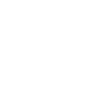

In [55]:
image

### Saving Image Data 

### Using Skimage to filter the well plates out from array

In [298]:
chosen = image2[0]
imarray = np.array(chosen)
height, width = chosen.shape

In [300]:
divh = int(height/8) #height of tile 
divw = int(width/12) #width of tile

print(divh, divw)
wellh = 8 #number of wells height in 96 well plate
wellw = 12 #number of wells width in 96 well plate

15 13


In [301]:
print(range(wellh))

range(0, 8)


In [329]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

for i in range(wellh):
    for j in range(wellw):
        xbeg = divh * j
        ybeg = divw * i
        for k in range(divh):
            for m in range(divw):
                rowin = xbeg + k
                colin = ybeg + m
                #print(rowin, colin)
                if rowin >= height:
                    rowin = height - 1
                else:
                    pass
                if colin >= width:
                    colin = width - 1
                else:
                    pass
                value = imarray[rowin][colin]
                splice[k][m] = value
        allsplice[i][j] = splice
    print(allsplice.shape)

(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)


In [330]:
allsplice[5][5]

array([[30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281, 30263, 30271, 30279, 30319, 30352, 30348,
        30374, 30380, 30376, 30416],
       [30325, 30317, 30281,

In [332]:
diff = allsplice[5][5] - allsplice[1][5]
diff

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [334]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

for i in range(wellh):
    for j in range(wellw):
        xbeg = divh * j
        ybeg = divw * i
        yend = divh * i
        xend = divw * j
        splice = imarray[ybeg:yend, xbeg:xend]
        #print(splice)
        allsplice[i][j] = splice
    #print(allsplice.shape)

In [261]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = []
splice = np.zeros((divh, divw), dtype = object)
xbeg = 0
ybeg = 0

for k in range(divh):
    #print(k)
    #print(xbeg, ybeg)
    for m in range(divw):
        #print(m)
        rowin = ybeg + k
        colin = xbeg + m
        #print(rowin, colin)
        value = imarray[rowin][colin]
        splice[k][m] = value


In [250]:
print(splice)

[[29993 29984 29966 29949 29941 29945 29951 29929 29939 29933 29937 29933
  29931]
 [30001 29976 29972 29956 29953 29966 29945 29935 29935 29939 29939 29937
  29933]
 [29982 29974 29982 29962 29949 29951 29962 29943 29941 29929 29945 29941
  29941]
 [29997 29980 29986 29974 29956 29956 29964 29943 29947 29949 29951 29953
  29931]
 [29989 29970 29968 29962 29968 29947 29953 29958 29958 29931 29933 29931
  29953]
 [30001 29982 29976 29968 29974 29958 29966 29962 29960 29935 29939 29947
  29945]
 [29984 29980 29978 29968 29962 29960 29974 29949 29933 29947 29931 29939
  29931]
 [29999 29980 29974 29962 29956 29956 29966 29947 29956 29949 29941 29956
  29949]
 [30007 29984 29986 29966 29947 29960 29974 29956 29949 29945 29937 29937
  29947]
 [30017 29997 29999 29976 29970 29962 29964 29964 29953 29947 29933 29947
  29947]
 [30019 30003 30009 29995 29993 29984 29984 29962 29966 29966 29949 29943
  29945]
 [30022 30005 29989 30007 29993 29999 30011 29972 29989 29976 29953 29951
  29966]
 [30

In [203]:
imarray[colin, rowin]

array([30075, 30056, 30054, 30044, 30046, 30038, 30028, 30034, 30011,
       30017, 30026, 30026, 30044, 30071, 30176, 30325, 30388, 30442,
       30475, 30491, 30501, 30497, 30499, 30489, 30493, 30497, 30501,
       30509, 30520, 30534, 30554, 30589, 30606, 30614, 30575, 30477,
       30434, 30414, 30386, 30388, 30378, 30336, 30323, 30327, 30352,
       30412, 30473, 30475, 30454, 30440, 30440, 30465, 30497, 30501,
       30374, 30325, 30279, 30259, 30259, 30299, 30346, 30394, 30558,
       30566, 30556, 30540, 30503, 30426, 30416, 30520, 30513, 30526,
       30550, 30544, 30485, 30591, 30581, 30384, 30305, 30297, 30299,
       30313, 30291, 30295, 30336, 30323, 30334, 30305, 30330, 30350,
       30265, 30261, 30376, 30392, 30400, 30473, 30542, 30552, 30548,
       30515, 30503, 30485, 30450, 30436, 30398, 30327, 30095, 29968,
       29929, 29916, 29912, 29914, 29910, 29902, 29893, 29883, 29896,
       29896, 29912, 29904, 29904, 29916, 29918, 29916, 29908, 29904,
       29898, 29902,

In [190]:
allsplice = np.zeros((wellh, wellw), dtype = object)


In [335]:
splice = np.zeros((divh, divw))
splice[3,3] = 5

In [336]:
allsplice[0,0] = splice[:]

In [131]:
allsplice[0,0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
array =([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [210]:
array[1][2]

8

In [92]:
array[:2][:1]

[[12, 5, 2, 4]]

### Using if splits to sort into separate bins

In [ ]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

row = 0
col = 0 

while row < height:
    while col < width:
        value = imarray[row][col]
        
                splice[k][m] = value
        allsplice[i][j] = splice
    print(allsplice.shape)

In [340]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

while row 
allsplice[:][:] = splice[:]

ValueError: could not broadcast input array from shape (15,13) into shape (8,12)

## More

In [342]:
chosen = image2[0]

height,width = chosen.shape
print(height,width)

120 160


In [343]:
divx = int(height/8)
divy = int(width/12)
print(divx,divy)
wellx = 8 #number of wells height in 96 well plate
welly = 12 #number of wells width in 96 well plate

15 13


In [345]:
allsplice = np.zeros((wellx,welly),dtype=object)
i =0 
for x in range(wellx):
    for y in range(welly):
        ybeg = divx * (x)
        yend = divx * (x+1)
        xbeg = divy * (y)
        xend = divy * (y+1)
        allsplice[x,y] = image2[i,ybeg:yend,xbeg:xend]
print(allsplice.shape)

(8, 12)


In [348]:
allsplice[5][1]

array([[30050, 30054, 30040, 30044, 30034, 30040, 30034, 30032, 30015,
        30007, 30001, 29997, 29993],
       [30054, 30060, 30052, 30058, 30056, 30058, 30044, 30009, 30005,
        30005, 29997, 29997, 29999],
       [30064, 30052, 30050, 30060, 30052, 30052, 30052, 30015, 30005,
        30003, 29993, 30001, 30001],
       [30040, 30048, 30046, 30044, 30040, 30052, 30042, 30011, 30015,
        30003, 29997, 30005, 29999],
       [30036, 30032, 30032, 30024, 30034, 30044, 30038, 30013, 30013,
        30009, 29999, 29999, 29991],
       [30030, 30030, 30017, 30005, 30009, 30015, 30028, 30017, 30007,
        29999, 29999, 29993, 29995],
       [30040, 30038, 30036, 30015, 30017, 30022, 30026, 30009, 30019,
        30009, 30011, 30007, 30003],
       [30011, 30017, 30028, 30028, 30026, 30019, 30032, 30013, 30022,
        30017, 29999, 29993, 30003],
       [30015, 30011, 30019, 30011, 30032, 30026, 30017, 30011, 30007,
        30011, 29995, 30005, 29991],
       [30026, 30017, 30019,

In [347]:
diff = allsplice[5][5] - allsplice[1][5]
diff

array([[  325,   333,   347,   373,   393,   473,   506,   475,   432,
          435,   501,   498,   418],
       [  327,   321,   331,   351,   371,   434,   498,   493,   431,
          398,   459,   382,   278],
       [  313,   280,   311,   353,   355,   427,   477,   499,   427,
          356,   274,   279,   217],
       [  336,   323,   367,   405,   393,   413,   486,   493,   434,
          248,   193,   205,   157],
       [  350,   320,   438,   411,   378,   415,   439,   425,   337,
          163,   127,   130,   105],
       [  351,   394,   494,   436,   374,   380,   390,   325,   260,
          145,    38,    70,   131],
       [  381,   445,   507,   439,   368,   356,   306,   236,   262,
           86, 65473,    86,   132],
       [  454,   461,   522,   431,   348,   295,   186,   205,   230,
           25, 65428,    64,    41],
       [  454,   464,   505,   465,   327,   221,   131,   129,   143,
        65473, 65440, 65455, 65434],
       [  436,   425,   503,

### 

### Soft: User modiciations
While we are using the 96 well plates for this experiment, there are many different sizes of well plates that will need to be accounted for. This will change the tiling and the sizes of the tiles in order to accomodate the change in wells. Our specific robot is designed with 96 well plates in mind although custom containers can be added with different specificiations. 

#### Common well plate specifications
* 96 well plate (2:3 rectangular mix - 8x12)
* 384 well plate (2:3 rectanguar mix - 16x24)
* 24 well plate (3x6)
